# Finite difference schemes

**(Correction and comments)**


The PDE problem under consideration is the linear advection equation with velocity $a=1$:
$$
    \begin{aligned}
    \partial_t  u+ a\partial_x u = 0,\\
    u(0,x) = u_0(x).
    \end{aligned}
$$


The discretization parameters are denoted $\Delta t>0$ and $\Delta x>0$. The Courant number $\mu := a\Delta t/\Delta x$ is a constant parameter to choose conveniently. The discrete initial data is $U^0_j=u_0(j\Delta x)$ for $j\in\mathbb{Z}$, and $U_j^n$ will be an approximation of $u(n\Delta t,j\Delta x)$. Several finite difference one-step schemes are successively considered (but some of them are never stable !)
\begin{align}
    \tag{L1}
    U_j^{n+1} &= U_j^n - \dfrac{a\Delta t}{\Delta x}\Bigl[U_j^n-U_{j-1}^n\Bigr]\\[0.5em]
    \tag{L2}
    U_j^{n+1} &= U_j^n - \dfrac{a\Delta t}{2\Delta x}\Bigl[3U_j^n-4U_{j-1}^n+U_{j-2}^n\Bigr]\\[0.5em]
    \tag{BW2}
    U_j^{n+1} &= U_j^n - \dfrac{a\Delta t}{2\Delta x}\Bigl[3U_j^n-4U_{j-1}^n+U_{j-2}^n\Bigr]+\dfrac{a^2\Delta t^2}{2\Delta x^2}\Bigl[U_j^n-2U_{j-1}^n+U_{j-2}^n\Bigr]\\
    \ \notag\\[0.5em]
    \tag{C2}
    U_j^{n+1} &= U_j^n - \dfrac{a\Delta t}{2\Delta x}\Bigl[U_{j+1}^n-U_{j-1}^n\Bigr] =  U_j^n - a\Delta t\, (\mathrm{D}_0U^n)_j\\[0.5em]
    \tag{LW2}
    U_j^{n+1} &= U_j^n - \dfrac{a\Delta t}{2\Delta x}\Bigl[U_{j+1}^n-U_{j-1}^n\Bigr] + \dfrac{a^2\Delta t^2}{2\Delta x^2}\Bigl[U_{j+1}^n-2U_{j}^n+U_{j-1}^n\Bigr]\\[0.5em]
    \ \notag\\[0.5em]
    \tag{C2-RK3}
    U_j^{n+1} &= U_j^n - a\Delta t\, \mathrm{D}_0(U^n)_j + \dfrac{1}{2} (a\Delta t\, \mathrm{D}_0)^2(U^n)_j - \dfrac{1}{6} (a\Delta t\, \mathrm{D}_0)^3(U^n)_j\\[0.5em]
    \tag{C2-CN2}
    U_j^{n+1} &+ \dfrac{a\Delta t}{2}\, \mathrm{D}_0(U^{n+1})_j = U_j^n - \dfrac{a\Delta t}{2}\, \mathrm{D}_0(U^n)_j
\end{align}

In [22]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt

plt.rcParams['font.size'] = 12.0
plt.rcParams['figure.figsize']=[8,8]

## 1. Symbolic stability study

### i. Symbol computations

Determine *on the paper* the corresponding symbol functions $g(\xi \Delta x)$ in terms of the CFL parameter $\mu$.  
For example the symbol of (L1) is
$$g(\theta)=1-\mu(1-\mathsf{e}^{-\mathsf{i}\theta}),\quad \theta\in[-\pi,\pi].$$

> We obtain:
> 
> (L2):
> $$g(\theta) = 1 - \dfrac{\mu}{2}(3-4\mathsf{e}^{-\mathsf{i}\theta}+\mathsf{e}^{-2\mathsf{i}\theta})$$
> (BW2):
> $$g(\theta) = 1 - \dfrac{\mu}{2}(3-4\mathsf{e}^{-\mathsf{i}\theta}+\mathsf{e}^{-2\mathsf{i}\theta}) + \dfrac{\mu^2}{2}(1-2\mathsf{e}^{-\mathsf{i}\theta}+\mathsf{e}^{-2\mathsf{i}\theta})$$
> (C2):
> $$g(\theta) = 1 - \dfrac{\mu}{2}(\mathsf{e}^{\mathsf{i}\theta}-\mathsf{e}^{-\mathsf{i}\theta})$$
> (LW2):
> $$g(\theta) = 1 - \dfrac{\mu}{2}(\mathsf{e}^{\mathsf{i}\theta}-\mathsf{e}^{-\mathsf{i}\theta}) + \dfrac{\mu^2}{2}(\mathsf{e}^{\mathsf{i}\theta}-2+\mathsf{e}^{-\mathsf{i}\theta})$$
> (C2-RK3):
> $$g(\theta) = 1 - \dfrac{\mu}{2}(\mathsf{e}^{\mathsf{i}\theta}-\mathsf{e}^{-\mathsf{i}\theta}) + \dfrac{\mu^2}{8}(\mathsf{e}^{\mathsf{i}\theta}-\mathsf{e}^{-\mathsf{i}\theta})^2 - \dfrac{\mu^3}{48}(\mathsf{e}^{\mathsf{i}\theta}-\mathsf{e}^{-\mathsf{i}\theta})^3$$
> (C2-CN2):
> $$g(\theta) = \dfrac{1 - \dfrac{\mu}{4}(\mathsf{e}^{\mathsf{i}\theta}-\mathsf{e}^{-\mathsf{i}\theta})}{1 + \dfrac{\mu}{4}(\mathsf{e}^{\mathsf{i}\theta}-\mathsf{e}^{-\mathsf{i}\theta})}$$

### ii. Representation of the symbol

Draw on the same figure, the complex curves $\theta\mapsto g(\theta)$ with the choice $\mu=0.95$. Also plot the unit circle $\theta\mapsto\mathsf{e}^{\mathsf{i}\theta}$ on the same figure.

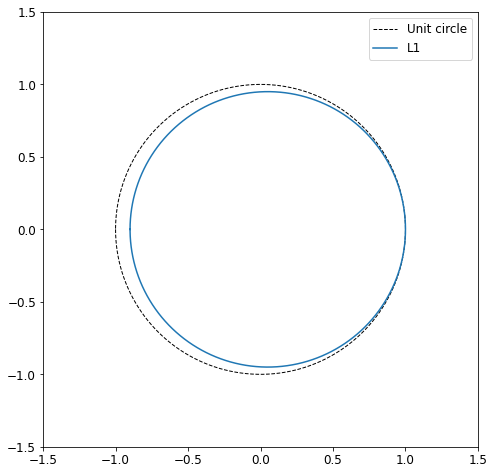

In [23]:
theta  = np.linspace(-np.pi,np.pi,500)
c = np.exp(1j*theta) # for the unit circle and the parameterization of exponentials in formulas

mu = 0.95
gL1    =  1 - mu*(1-c**(-1)) 

plt.plot(np.real(c),np.imag(c), linestyle=('dashed'), linewidth=1, color="black")
for g in [gL1]:
    plt.plot(np.real(g),np.imag(g))
plt.legend(["Unit circle","L1"])
plt.axis('square')
plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)
plt.show()

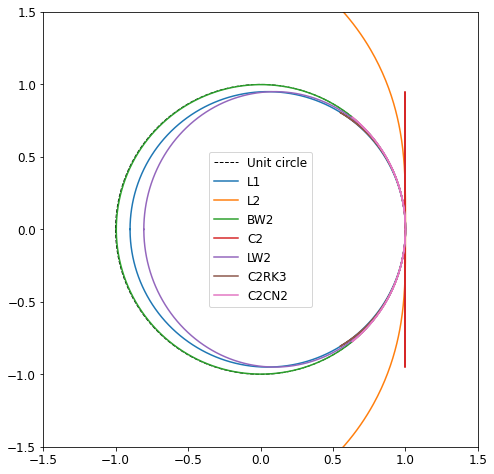

In [24]:
theta  = np.linspace(-np.pi,np.pi,500)
c = np.exp(1j*theta) # for the unit circle and the parameterization of exponentials in formulas

mu = 0.95

gL1    =  1 - mu*(1-c**(-1)) 

gL2    =  1 - mu/2*(3 - 4*c**(-1) + c**(-2))

gBW2   =  1 - mu/2*(3 - 4*c**(-1) + c**(-2)) \
            + mu**2/2*(1 - 2*c**(-1) + c**(-2))

gC2    =  1 - mu/2*(c - c**(-1))

gLW2   =  1 - mu/2*(c - c**(-1)) \
            + mu**2/2*(c - 2 + c**(-1))

gC2RK3 =  1 - mu/2*(c-c**(-1)) \
            + 1/2*(- mu/2*(c - c**(-1)))**2 \
            + 1/6*(- mu/2*(c - c**(-1)))**3

gC2CN2 = (1 - mu/4*(c - c**(-1))) / (1 + mu/4*(c - c**(-1)))

plt.plot(np.real(c),np.imag(c), linestyle=('dashed'), linewidth=1, color="black")
for g in [gL1,gL2,gBW2,gC2,gLW2,gC2RK3,gC2CN2]:
    plt.plot(np.real(g),np.imag(g))

plt.legend(["Unit circle","L1","L2","BW2","C2","LW2","C2RK3","C2CN2"])
plt.axis('square')
plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)
plt.show()

### iii. Stability domains

Using the above representation, check numerically the following CFL uniform stability conditions $\mathsf{Stab}=\{\mu\in\mathbb{R} \text{ s.t.} \|g\|_\infty\leq 1\}$ *(no mathematical proof is required here)*.

 - L1 stable iff $\mu\in[0,1]$
 - L2 **unstable** for any $\mu$
 - BW2 stable iff $\mu\in[0,2]$
 - C2 **unstable** for any $\mu$
 - LW2 stable iff $\mu\in[-1,1]$
 - C2RK3 stable iff $\mu\in[-\sqrt{3},\sqrt{3}]$ (we did the exact computation together)
 - C2CN2 **stable for any $\mu$**

## 2. Numerical simulations

The PDE problem $\partial_t u + a \partial_x u =0$ is set over the periodic space domain $\mathbb{T}$ (that is the torus $\mathbb{R}/\mathbb{Z}$ identified to the interval $[0,1]$ with the appropriate boundary conditions).  
At the discrete level, the space points $x_j = j\Delta x$ are considered only for indices $0\leq j\leq J-1$. The integer $J$ is the "main" parameter and $\Delta x$ is deduced from the scaling relation $J\Delta x = 1$ ; the (independant) space points are then $x_j\in[0,1[$ for indices $0\leq j\leq J-1$.  
The numerical boundary conditions are obtained by the periodicity property $U_{j+J}^n = U_j^n$ for any required integer $j$.  
The numerical solution is computed up to the time $T>0$.  

In the first tests, we consider the following initial data and parameters
\begin{equation*}
    u_0(x) = \sin(2\omega \pi x),\qquad \omega = 4,\quad J=100,\quad T=2,\quad \mu=0.95.
\end{equation*}

The following algorithm may help for your code:
```python
# Physical data
a = 1
T = 2
# Initial data
omega = 4
u0 = lambda x: np.sin(2*omega*np.pi*x)
# Numerical parameters
J = 100
mu = 0.95
# Discretization parameters
dx = 1/J
dt = mu*dx/a
# Space grid
x = np.linspace(0, 1, J+1)
x = x[0:-1] # removes the very last point for periodicity

## Initialize
t = 0
U = u0(x)

## Iterate in time
while t<T:
    dt = min([dt,T-t])
    V = np.concatenate(([U[-1]],U,[U[0]]))
    U = V[1:-1] - a*dt/(2*dx)*(V[2:]-V[:-2]) # example for the scheme C2
    t = t + dt
    
plt.plot(x,U,'.-',x,u0(x))
plt.legend(["scheme C2, J ="+str(J),"exact solution"])
plt.title('at time T='+str(T))
plt.show()
```

> Some comments on the `while` loop
> - the first line corresponds to a slight adaptation of `dt` for the lastest iteration in order to exactly reach the final time $T$, this is important in particular for the convergence analysis
> - the second line is a simple way to take into account the periodic boundary condition by the ghost cell method, ghost periodic values are added to the vector `U`
> - the third line is the vectorial update of the vector with appropriate shifts in the invisible index $j$.
> - Only the second and third lines depend on the selected scheme and could be encapsulated in a specific function.

### i. First schemes

Adapt the previous code and try it for (at least one of) the schemes (L1), (LW2), (BW2).

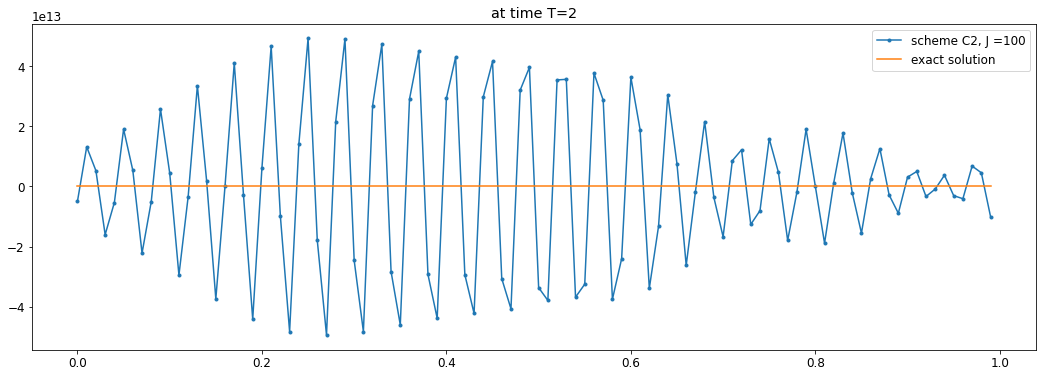

In [33]:
plt.rcParams['figure.figsize']=[18,6]

# Physical data
a = 1
T = 2
# Initial data
omega = 4
u0 = lambda x: np.sin(2*omega*np.pi*x)
# Numerical parameters
J = 100
mu = 0.95
# Discretization parameters
dx = 1/J
dt = mu*dx/a
# Space grid
x = np.linspace(0, 1, J+1)
x = x[0:-1] # removes the very last point for periodicity

## Initialize
t = 0
U = u0(x)

## Iterate in time
while t<T:
    dt = min([dt,T-t])
    V = np.concatenate(([U[-1]],U,[U[0]]))
    U = V[1:-1] - a*dt/(2*dx)*(V[2:]-V[:-2]) # example for the scheme C2
    t = t + dt

plt.plot(x,U,'.-',x,u0(x))
plt.legend(["scheme C2, J ="+str(J),"exact solution"])
plt.title('at time T='+str(T))
plt.show()

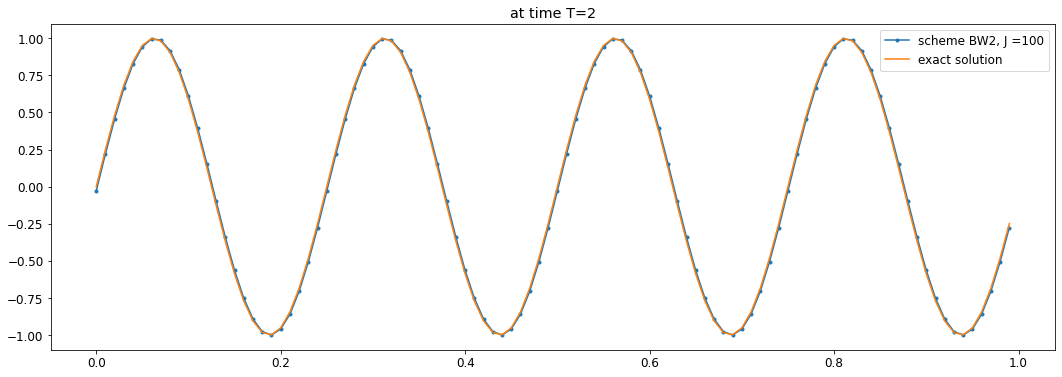

In [34]:
# Physical data
a = 1
T = 2
# Initial data
omega = 4
u0 = lambda x: np.sin(2*omega*np.pi*x)
# Numerical parameters
J = 100
mu = 0.95
# Discretization parameters
dx = 1/J
dt = mu*dx/a
# Space grid
x = np.linspace(0, 1, J+1)
x = x[0:-1] # removes the very last point for periodicity

## Initialize
t = 0
U = u0(x)

## Iterate in time
while t<T:
    dt = min([dt,T-t])
    V = np.concatenate(([U[-2],U[-1]],U)) # Two ghost cells on the left and no ghost cell on the right
    U = V[2:] - a*dt/(2*dx)*(3*V[2:]-4*V[1:-1]+V[0:-2]) + a**2*dt**2/(2*dx**2)*(V[2:]-2*V[1:-1]+V[0:-2])
    t = t + dt

plt.plot(x,U,'.-',x,u0(x))
plt.legend(["scheme BW2, J ="+str(J),"exact solution"])
plt.title('at time T='+str(T))
plt.show()

### ii. High frequency behavior

For a fixed value of $J$ but choosing now several high values of the physical frequency parameter $\omega$ in the initial data, what happens ? (increase $J$ and try again).

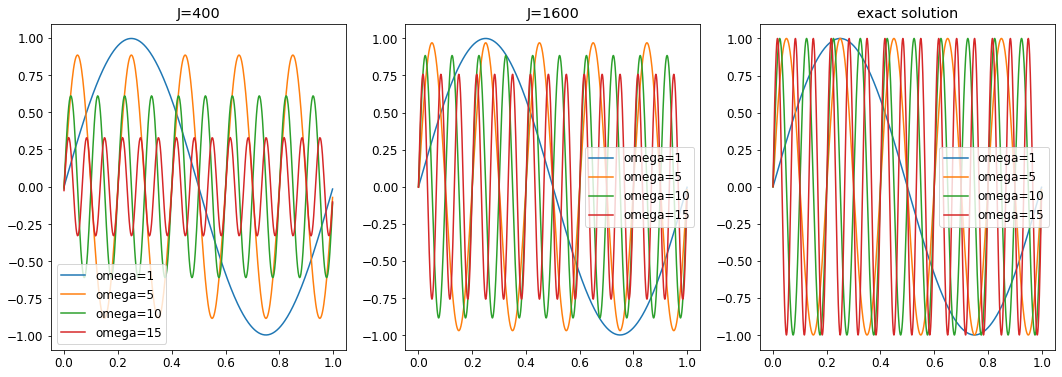

In [35]:
# Physical data
a = 1
T = 2

List_Omega = [1,5,10,15]

######################################################

plt.subplot(1,3,1)

for omega in List_Omega:
    u0 = lambda x: np.sin(2*omega*np.pi*x)
    # Numerical data
    J = 400
    mu = 0.95
    # Discretization parameters
    dx = 1/J
    dt = mu*dx/a
    # Space grid
    x = np.linspace(0, 1, J+1)
    x = x[0:-1] # removes the very last point for periodicity

    ## Initialize
    t = 0
    U = u0(x)

    ## Iterate in time
    while t<T:
        dt = min([dt,T-t])
        V = np.concatenate(([U[-1]],U))
        U = V[1:] - a*dt/dx*(V[1:]-V[:-1])
        t = t+dt

    plt.plot(x,U,label = "omega="+str(omega))

plt.title("J="+str(J))
plt.legend()


######################################################

plt.subplot(1,3,2)

for omega in List_Omega:
    u0 = lambda x: np.sin(2*omega*np.pi*x)
    # Numerical data
    J = 1600
    mu = 0.95
    # Discretization parameters
    dx = 1/J
    dt = mu*dx/a
    # Space grid
    x = np.linspace(0, 1, J+1)
    x = x[0:-1] # removes the very last point for periodicity

    ## Initialize
    t = 0
    U = u0(x)

    ## Iterate in time
    while t<T:
        dt = min([dt,T-t])
        V = np.concatenate(([U[-1]],U))
        U = V[1:] - a*dt/dx*(V[1:]-V[:-1])
        t = t+dt

    plt.plot(x,U,label = "omega="+str(omega))

plt.title("J="+str(J))
plt.legend()

######################################################

plt.subplot(1,3,3)

for omega in List_Omega:
    u0 = lambda x: np.sin(2*omega*np.pi*x)
    # Numerical data
    J = 1600
    mu = 0.95
    # Discretization parameters
    dx = 1/J
    dt = mu*dx/a
    # Space grid
    x = np.linspace(0, 1, J+1)
    x = x[0:-1] # removes the very last point for periodicity

    plt.plot(x,u0(x),label = "omega="+str(omega))

plt.title("exact solution")
plt.legend()

######################################################

plt.show()

> Observations :
> - for a given grid, the high frequencies are more attenuated than the low frequencies
> - increasing the number of points reduces that dissipation phenomenon

## 3. Convergence experiments

The following box code proposes in a structured way the many above schemes considered through a generical structure functions. The name of a scheme `name_iteration` is given as a parameter in the main function `SCHEME`.

In [36]:
# Algorithme generique

def SCHEME(name_iteration,a,T,u0,J,mu):
    # Discretization parameters
    dx = 1/J
    dt = mu*dx/a
    # Space grid
    x = np.linspace(0, 1, J+1)
    x = x[0:-1] # removes the very last point for periodicity
    ## Initialize
    t = 0
    U = u0(x)
    ## Iterate in time
    while t<T:
        dt = min([dt,T-t])
        U = name_iteration(U,a,dt,dx)
        t = t+dt
    return(x,U)

In [37]:
def L1(U,a,dt,dx):
    V = np.concatenate(([U[-1]],U))    # boundary condition
    U = V[1:] - a*dt/dx*(V[1:]-V[:-1]) # iteration formula
    return(U)

def L2(U,a,dt,dx):
    V = np.concatenate(([U[-2],U[-1]],U))
    U = V[2:] - a*dt/(2*dx)*(3*V[2:]-4*V[1:-1]+V[0:-2])
    return(U)

def BW2(U,a,dt,dx):
    V = np.concatenate(([U[-2],U[-1]],U))
    U = V[2:] - a*dt/(2*dx)*(3*V[2:]-4*V[1:-1]+V[0:-2]) + a**2*dt**2/(2*dx**2)*(V[2:]-2*V[1:-1]+V[0:-2])
    return(U)

def C2(U,a,dt,dx):
    V = np.concatenate(([U[-1]],U,[U[0]]))
    U = V[1:-1] - a*dt/(2*dx)*(V[2:]-V[:-2])
    return(U)

def LW2(U,a,dt,dx):
    V = np.concatenate(([U[-1]],U,[U[0]]))
    U = V[1:-1] - a*dt/(2*dx)*(V[2:]-V[:-2]) + a**2*dt**2/(2*dx**2)*(V[2:]-2*V[1:-1]+V[0:-2])
    return(U)

def C2RK3(U,a,dt,dx):
    # a simple iterative way to compute the powers of an operator :
    V = np.concatenate(([U[-3],U[-2],U[-1]],U,[U[0],U[1],U[2]]))
    D0V_0 = V
    D0V_1 = a*dt/(2*dx)*(D0V_0[2:]-D0V_0[:-2])
    D0V_2 = a*dt/(2*dx)*(D0V_1[2:]-D0V_1[:-2])
    D0V_3 = a*dt/(2*dx)*(D0V_2[2:]-D0V_2[:-2])
    U = V[3:-3] - D0V_1[2:-2] + 1/2*D0V_2[1:-1] - 1/6*D0V_3 # Runge-Kutta 3 method
    return(U)

def C2CN2(U,a,dt,dx):
    # The implicit Crank-Nicolson solver requires some linear algebra
    # The following code can be seriously improved by using sparse (or "homemade"-) methods to solve the tridiagonal system rather than the generical np.linalg.solve method
    J = np.size(U)
    MatrixExp = np.eye(J) - a*dt/(4*dx)*(np.diag(np.ones(J-1),1) - np.diag(np.ones(J-1),-1) - np.diag([1],J-1) + np.diag([1],1-J))
    MatrixImp = np.eye(J) + a*dt/(4*dx)*(np.diag(np.ones(J-1),1) - np.diag(np.ones(J-1),-1) - np.diag([1],J-1) + np.diag([1],1-J))
    U = np.linalg.solve(MatrixImp,MatrixExp@U)
    return(U)


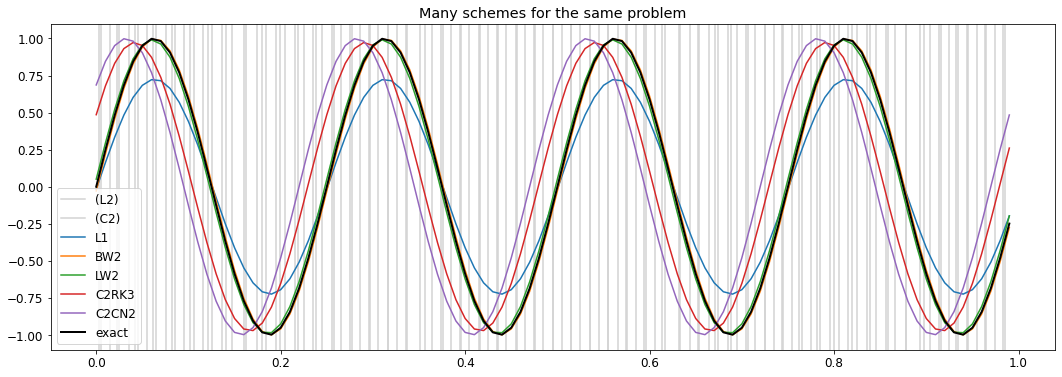

In [38]:
######################################################
## SOME TEST OR EXAMPLE FOR USING THE ABOVE METHODS ##
######################################################

# Physical data
a = 1
T = 2
omega = 4
u0 = lambda x: np.sin(2*omega*np.pi*x)

# Numerical data
J = 100
mu = 0.95

for name_iteration in [L2,C2]: # unstable schemes (separately to change the color)
    [x,U] = SCHEME(name_iteration,a,T,u0,J,mu)
    plt.plot(x,U,color="lightgray")

for name_iteration in [L1,BW2,LW2,C2RK3,C2CN2]: # stable schemes
    [x,U] = SCHEME(name_iteration,a,T,u0,J,mu)
    plt.plot(x,U)
plt.plot(x,u0(x-a*T),color="black",linewidth=2)

plt.legend(["(L2)","(C2)","L1","BW2","LW2","C2RK3","C2CN2","exact"])
plt.title("Many schemes for the same problem")
plt.ylim(-1.1,1.1)

plt.show()

### i. Convergence

Considering one of the previous schemes, increase the value of $J$ and observe *graphically* the convergence by comparing the curves $u(T,x_j)$ and the last time-iteration $U_j^n$.

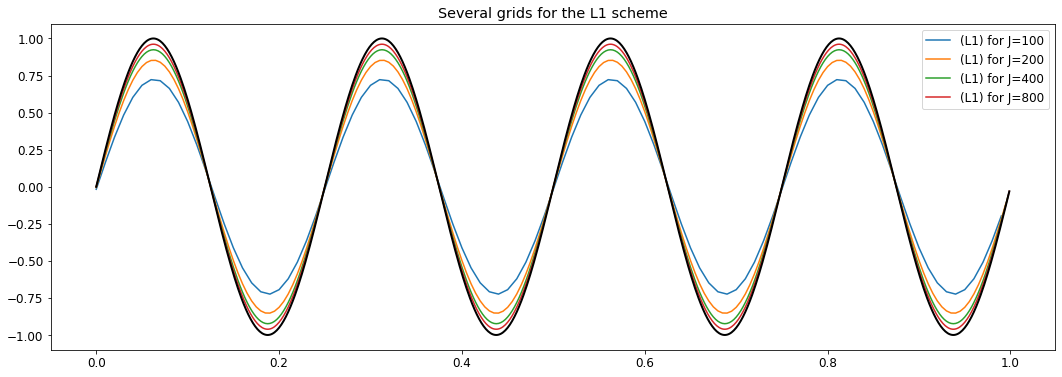

In [56]:
# Physical data
a = 1
T = 2
omega = 4
u0 = lambda x: np.sin(2*omega*np.pi*x)

# Numerical data
for J in [100,200,400,800]:

    mu = 0.95

    for name_iteration in [L1]:
        [x,U] = SCHEME(name_iteration,a,T,u0,J,mu)
        plt.plot(x,U)
    
plt.plot(x,u0(x-a*T),color="black",linewidth=2)
plt.legend(["(L1) for J="+str(ST) for ST in [100,200,400,800]])
plt.title("Several grids for the L1 scheme")
plt.ylim(-1.1,1.1)

plt.show()

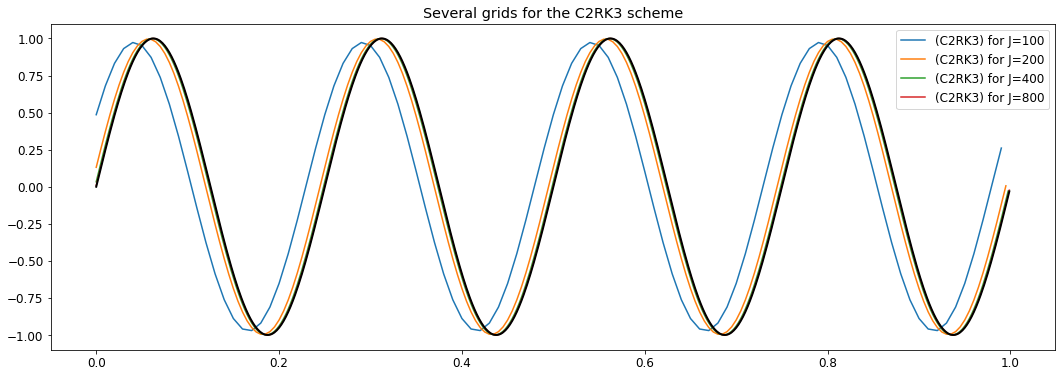

In [57]:
# Physical data
a = 1
T = 2
omega = 4
u0 = lambda x: np.sin(2*omega*np.pi*x)

# Numerical data
for J in [100,200,400,800]:

    mu = 0.95

    for name_iteration in [C2RK3]:
        [x,U] = SCHEME(name_iteration,a,T,u0,J,mu)
        plt.plot(x,U)
    
plt.plot(x,u0(x-a*T),color="black",linewidth=2)
plt.legend(["(C2RK3) for J="+str(ST) for ST in [100,200,400,800]])
plt.title("Several grids for the C2RK3 scheme")
plt.ylim(-1.1,1.1)

plt.show()

### ii. Convergence order

Choose a smooth data $u_0\in\mathcal{C}^\infty(\mathbb{T})$ and for several value of $J$, compute the $\ell^2$-error at the same final time $t=T$, meaning with the final iteration index $N$ (if needed choose a short final time $T=0.2$ so that your code runs faster).  
Illustrate the convergence of (L1) at order $\beta=1$ and of (BW2) at order $\beta=2$ in the following sense:
$$
    \|U^N_j - u(T,x_j)\| \leq C(T,u_0) \Delta x^{\beta}.
$$
*Hint: compute and then draw $\ln(\|U^N_j - u(T,x_j)\|)$ with respect to $\ln(\Delta x)$.*  

What is the effective order of convergence of the any other schemes ?

Order L1 	 1.073968519096024
Order BW2 	 2.056544640617637
Order LW2 	 2.0854865483376157
Order C2RK3 	 1.9993941131239223
Order C2CN2 	 1.9963381183908047


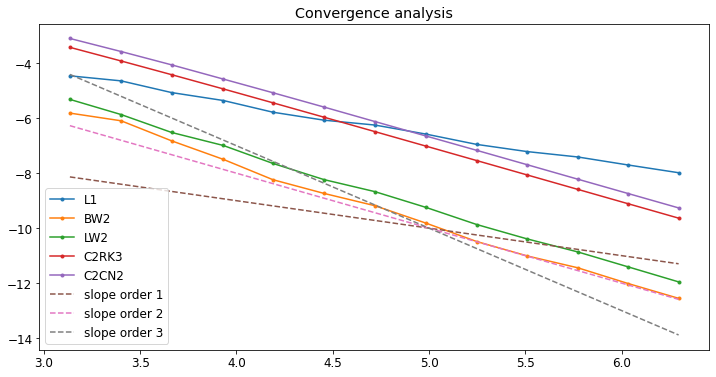

In [65]:
plt.rcParams['figure.figsize']=[12,6]

a = 1
T = 0.2
mu = 0.95

u0 = lambda x: np.exp(-50*(x-0.5)**2)
exact = lambda t,x : u0( (x-a*t) % (1-0) ) # periodized exact solution

ListeJ = np.array([int(np.floor(1.3**k)) for k in range(12,25)])
ErrorJ = np.zeros([ListeJ.shape[0],1])

Name = ["L1","BW2","LW2","C2RK3","C2CN2"]

plt.title("Convergence analysis")

kname = 0
for name_iteration in [L1,BW2,LW2,C2RK3,C2CN2]:

    for k,J in enumerate(ListeJ):
        [x,U] = SCHEME(name_iteration,a,T,u0,J,mu)
        ErrorJ[k] = np.sqrt(x[1]-x[0])*np.linalg.norm(U-exact(T,x),2)

    samp = -2 # index of first point for the linear regression (to compute the slope at the finer grids)
    order2 = np.polyfit(-np.log(ListeJ[samp:]), np.log(ErrorJ[samp:]), 1)
    print('Order',str(Name[kname]),"\t",order2[0][0])
    
    plt.plot(np.log(ListeJ),np.log(ErrorJ),'.-')
    kname += 1

plt.plot(np.log(ListeJ),-1*np.log(ListeJ)-5,'--',np.log(ListeJ),-2*np.log(ListeJ)-0,'--',np.log(ListeJ),-3*np.log(ListeJ)+5,'--')
plt.legend(["L1","BW2","LW2","C2RK3","C2CN2","slope order 1","slope order 2","slope order 3"])

plt.show()

> **Some comments**
> - We observe the convergence curves, representing the log of the $\ell^2$-error in terms of the log of the number of points $J$ in the grid.  
> - Reference straight lines with respective slope 1, 2 and 3 are also represented.On the other side, the slopes are computed numerically by using the last 2 points for each convergence curve (and a linear regression procedure).  
> - The scheme L1 is order 1 ;  
>   The schemes BW2, LW2, C2RK3 and C2CN2 are order 2.  
> - Here the ratio $\Delta t/\Delta x$ is kept constant so that the expected order $\Delta t^3$ in time expected for C2RK3 is not observed (actually the space error $\Delta x^2$ is dominant in front of the time error $\Delta x^3$).

### ii. The (O3) scheme is third order

We introduce the following new scheme that consists in a convex combination of two second order schemes to produce a higher order scheme (with Courant number $\mu\in[0,2]$):
\begin{equation}
    \tag{O3}
U_j^{n+1} = \dfrac{2-\mu}{3}\text{(LW2)} + \dfrac{1+\mu}{3}\text{(BW2)}.
\end{equation}
Observe that it is convergent at order $\beta=3$.

Order O3 	 3.072127535673051


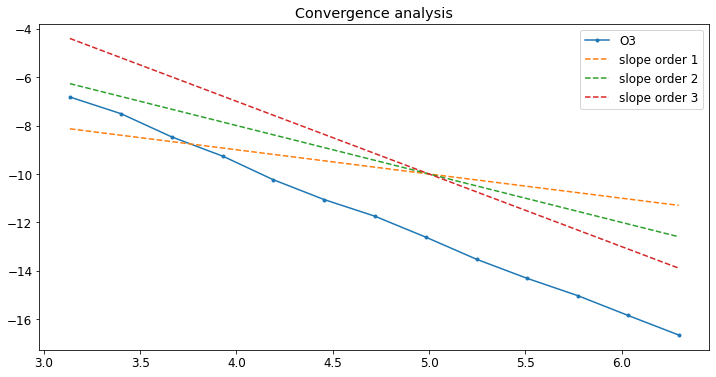

In [66]:
def O3(U,a,dt,dx):
    U = (2 - a*dt/dx)/3*LW2(U,a,dt,dx) + (1 + a*dt/dx)/3*BW2(U,a,dt,dx)
    return(U)

plt.rcParams['figure.figsize']=[12,6]

a = 1
T = 0.2
mu = 0.95

u0 = lambda x: np.exp(-50*(x-0.5)**2)
exact = lambda t,x : u0( (x-a*t) % (1-0) ) # periodized exact solution

ListeJ = np.array([int(np.floor(1.3**k)) for k in range(12,25)])
ErrorJ = np.zeros([ListeJ.shape[0],1])

Name = ["O3"]

plt.title("Convergence analysis")

kname = 0
for name_iteration in [O3]:

    for k,J in enumerate(ListeJ):
        [x,U] = SCHEME(name_iteration,a,T,u0,J,mu)
        ErrorJ[k] = np.sqrt(x[1]-x[0])*np.linalg.norm(U-exact(T,x),2)

    samp = -2 # index of first point for the linear regression (to compute the slope at the finer grids)
    order2 = np.polyfit(-np.log(ListeJ[samp:]), np.log(ErrorJ[samp:]), 1)
    print('Order',str(Name[kname]),"\t",order2[0][0])
    
    plt.plot(np.log(ListeJ),np.log(ErrorJ),'.-')
    kname += 1

plt.plot(np.log(ListeJ),-1*np.log(ListeJ)-5,'--',np.log(ListeJ),-2*np.log(ListeJ)-0,'--',np.log(ListeJ),-3*np.log(ListeJ)+5,'--')
plt.legend(["O3","slope order 1","slope order 2","slope order 3"])

plt.show()

## 4. Dissipation and dispersion effects

To reveal the behavior at high discrete frequencies, we consider the discrete Dirac initial data
$$
    U_j^0 =
    \begin{cases}
    1,& j=0,\\
    0,& j=1,\dots,J-1.
    \end{cases}
$$
Any more general initial data can be interpreted as a superposition of translated versions of the above initial data, and by linearity, the corresponding time-evolved solution the same superposition of the corresponding discrete solutions.  
The numerical solution is computed at the final time $T=0.25$ (try first once the scheme (L1) with the parameter $\mu=1$: the discrete solution is then the exact one !).

We compute the numerical solution for the schemes (L1), (BW2), (LW2), (CRK3) and (O3).  

We compare them graphically successively for $\mu=0.95$ and then again with $\mu=0.10$. Still at the final time $T=0.25$ and with $J=400$ points.

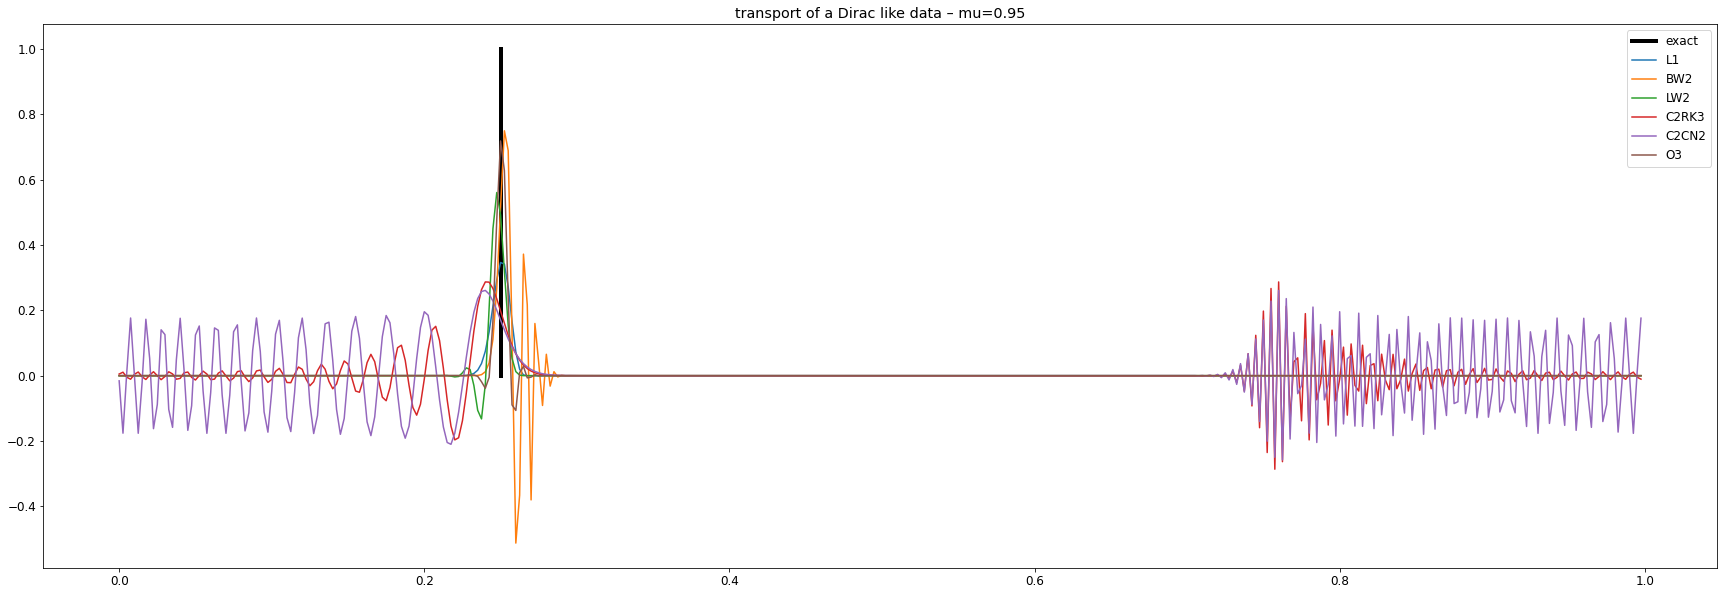

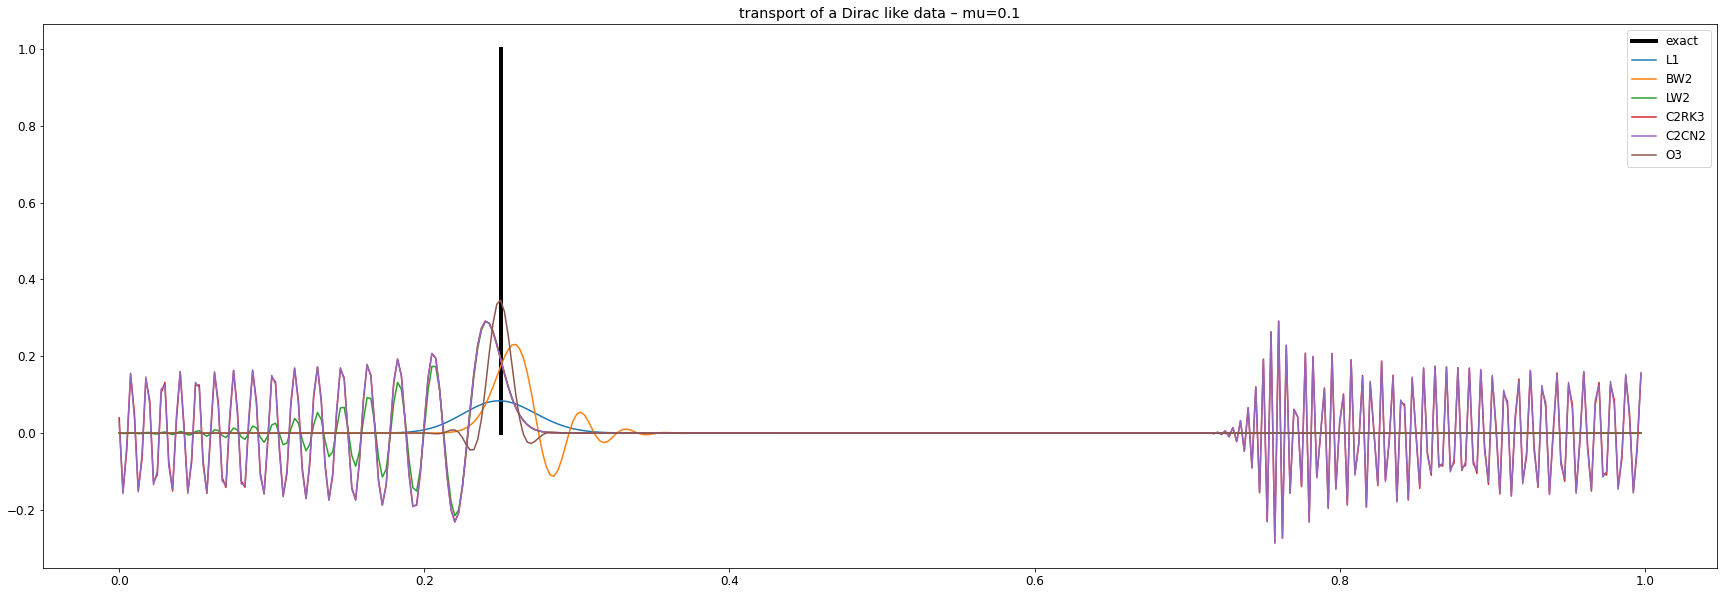

In [68]:
u0 = lambda x: [1-np.sign(y-0.0001)*np.sign(y+0.0001) for y in x]

J = 400
T = 0.25

mu = 0.95

plt.rcParams['figure.figsize']=[30,10]

plt.plot([T % 1, T % 1],[0,1],'k',linewidth=4)
for name_iteration in [L1,BW2,LW2,C2RK3,C2CN2,O3]:
    [x,U] = SCHEME(name_iteration,a,T,u0,J,mu)
    plt.plot(x,U)
plt.legend(["exact","L1","BW2","LW2","C2RK3","C2CN2","O3"])
plt.title('transport of a Dirac like data – mu='+str(mu))
plt.show()

######################################################################

mu = 0.10

plt.rcParams['figure.figsize']=[30,10]

plt.plot([T % 1, T % 1],[0,1],'k',linewidth=4)
for name_iteration in [L1,BW2,LW2,C2RK3,C2CN2,O3]:
    [x,U] = SCHEME(name_iteration,a,T,u0,J,mu)
    plt.plot(x,U)
plt.legend(["exact","L1","BW2","LW2","C2RK3","C2CN2","O3"])
plt.title('transport of a Dirac like data – mu='+str(mu))
plt.show()

> **Comments**  
> - The discrete Dirac is advected in space but its shape is strongly modified (in the amplitude, oscillations, size and position of the support)
> - This profile depends on the scheme (and also of $\mu$)
> - The scheme C2CN2 has the most oscillating and extended-in-space pattern
> - The schemes L1 and O3 have a quite simple pattern, similar or close to a gaussian shaped function

### Back to symbolic analysis

We introduce the real-valued function $\rho$ (positive) and $\alpha$ such that the symbol is $g(\xi\Delta x) = \rho(\xi\Delta x)\, \mathsf{exp}(-\mathsf{i}\xi\Delta t\,\alpha(\xi\Delta x)).$
The quantity $\alpha(\theta)$ is called the **phase velocity** for waves of frequency $\theta$. We observe that if $\rho(\xi\Delta x)=1$ then $g(\xi\Delta x)^n = \mathsf{e}^{-\mathsf{i} \xi n\Delta t\, \alpha(\xi\Delta x)}$. Assuming that the exact velocity $a$ is well approximated by $\alpha(\xi\Delta x)$ this last quantity is $\simeq \mathsf{e}^{-\mathsf{i} \xi t_n a}$.  

Draw *numerically* on the same picture the dissipation factor $\rho(\theta)$ as a function of $\theta\in[-\pi,\pi]$ and on a second picture the dispersion factor $\alpha(\theta)$ for the two parameters $\mu=0.95$ and $\mu=0.10$.

Interpret the above results from the observed properties.

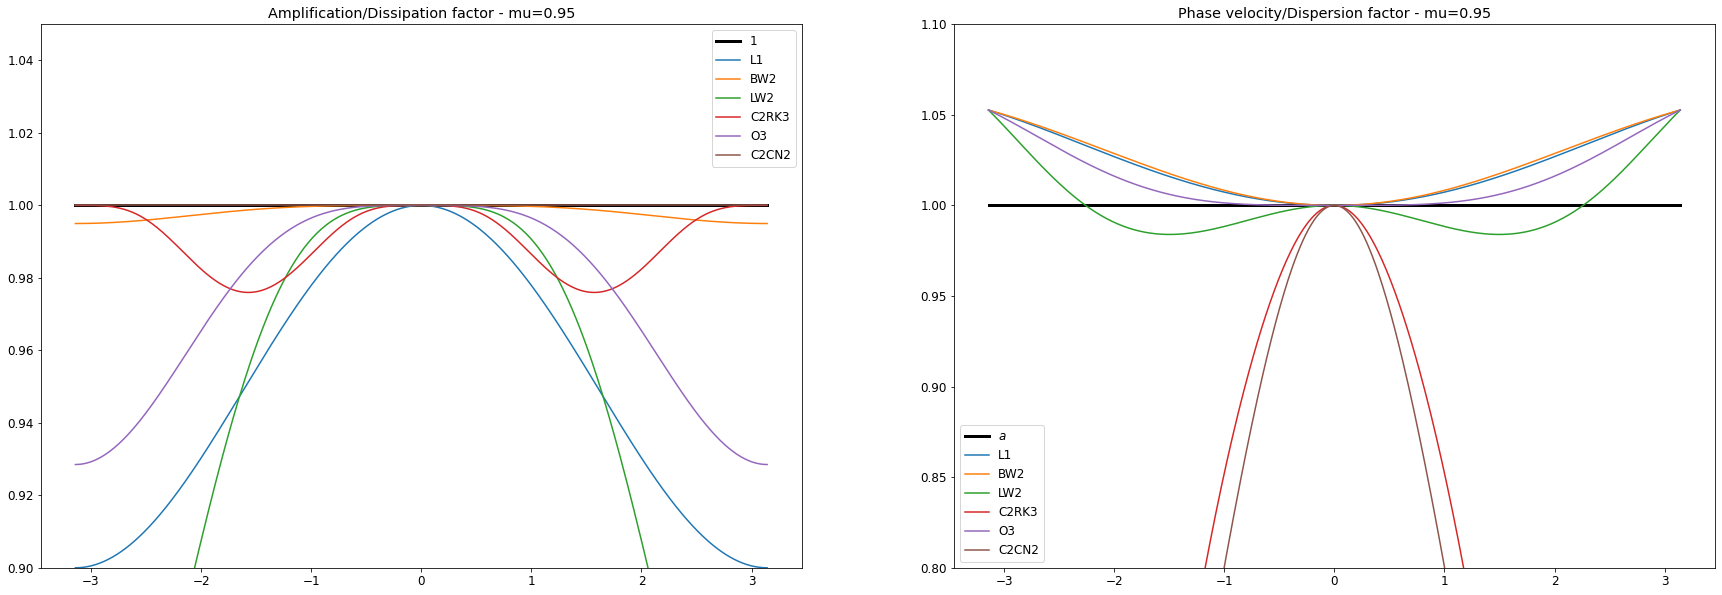

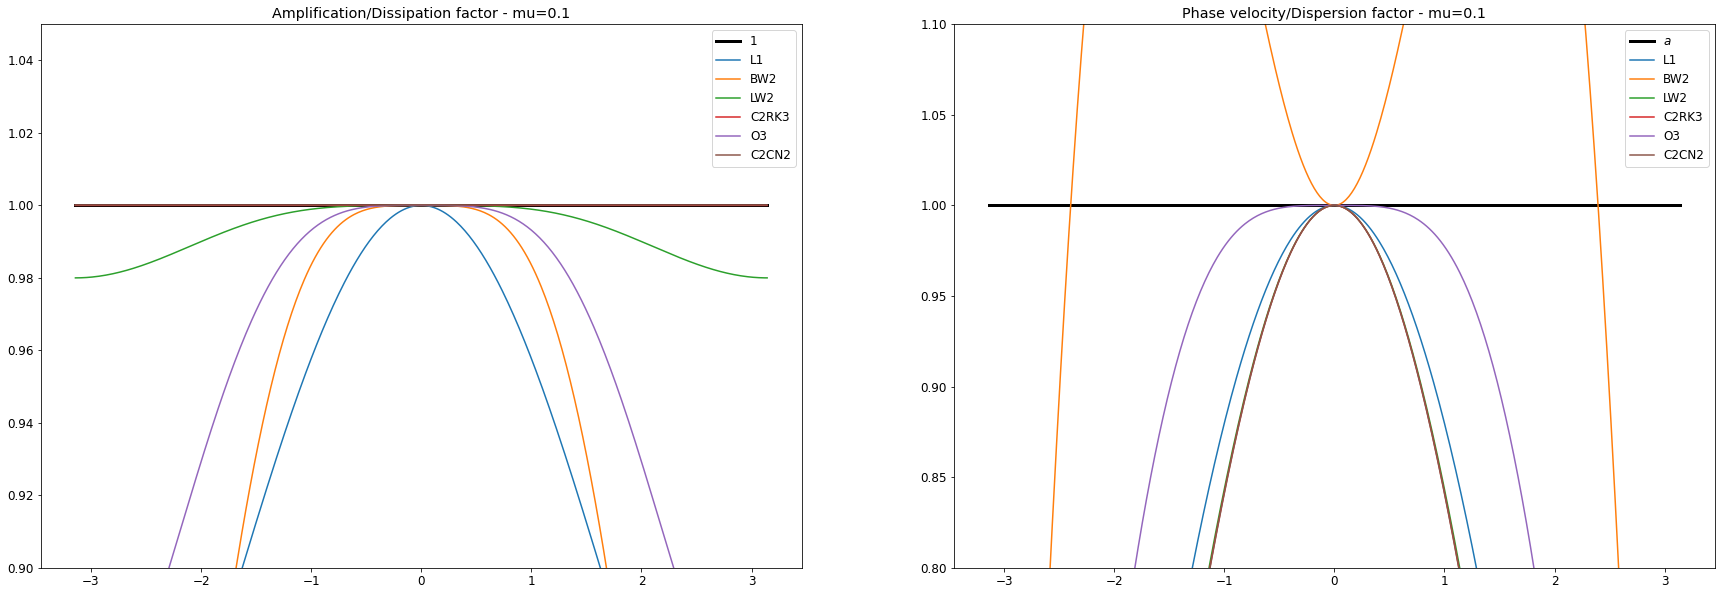

In [69]:
theta  = np.linspace(-np.pi,np.pi,500)
c = np.exp(1j*theta)

######################################################################

mu = 0.95

gL1    =  1 - mu*(1-c**(-1)) 
gL2    =  1 - mu/2*(3 - 4*c**(-1) + c**(-2))
gBW2   =  1 - mu/2*(3 - 4*c**(-1) + c**(-2)) \
            + mu**2/2*(1 - 2*c**(-1) + c**(-2))
gC2    =  1 - mu/2*(c - c**(-1))
gLW2   =  1 - mu/2*(c - c**(-1)) \
            + mu**2/2*(c - 2 + c**(-1))
gC2RK3 =  1 - mu/2*(c-c**(-1)) \
            + 1/2*(- mu/2*(c - c**(-1)))**2 \
            + 1/6*(- mu/2*(c - c**(-1)))**3
gC2CN2 = (1 - mu/4*(c - c**(-1))) / (1 + mu/4*(c - c**(-1)))
g03    =  (2 - mu)/3*gLW2 + (1 + mu)/3*gBW2

plt.subplot(1,2,1)
plt.plot(theta,np.ones_like(theta),"k",linewidth=3)
for g in [gL1,gBW2,gLW2,gC2RK3,g03,gC2CN2]:
    plt.plot(theta,np.abs(g))
plt.legend(["1","L1","BW2","LW2","C2RK3","O3","C2CN2"])
plt.ylim((0.9, 1.05))
plt.title("Amplification/Dissipation factor - mu="+str(mu))

plt.subplot(1,2,2)
plt.plot(theta,np.ones_like(theta),"k",linewidth=3)
for g in [gL1,gBW2,gLW2,gC2RK3,g03,gC2CN2]:
    plt.plot(theta,-np.angle(g)/theta/mu)
plt.legend(["$a$","L1","BW2","LW2","C2RK3","O3","C2CN2"])
plt.ylim((0.8, 1.1))
plt.title("Phase velocity/Dispersion factor - mu="+str(mu))

plt.show()

######################################################################

mu = 0.10

gL1    =  1 - mu*(1-c**(-1)) 
gL2    =  1 - mu/2*(3 - 4*c**(-1) + c**(-2))
gBW2   =  1 - mu/2*(3 - 4*c**(-1) + c**(-2)) \
            + mu**2/2*(1 - 2*c**(-1) + c**(-2))
gC2    =  1 - mu/2*(c - c**(-1))
gLW2   =  1 - mu/2*(c - c**(-1)) \
            + mu**2/2*(c - 2 + c**(-1))
gC2RK3 =  1 - mu/2*(c-c**(-1)) \
            + 1/2*(- mu/2*(c - c**(-1)))**2 \
            + 1/6*(- mu/2*(c - c**(-1)))**3
gC2CN2 = (1 - mu/4*(c - c**(-1))) / (1 + mu/4*(c - c**(-1)))
g03    =  (2 - mu)/3*gLW2 + (1 + mu)/3*gBW2

plt.subplot(1,2,1)
plt.plot(theta,np.ones_like(theta),"k",linewidth=3)
for g in [gL1,gBW2,gLW2,gC2RK3,g03,gC2CN2]:
    plt.plot(theta,np.abs(g))
plt.legend(["1","L1","BW2","LW2","C2RK3","O3","C2CN2"])
plt.ylim((0.9, 1.05))
plt.title("Amplification/Dissipation factor - mu="+str(mu))

plt.subplot(1,2,2)
plt.plot(theta,np.ones_like(theta),"k",linewidth=3)
for g in [gL1,gBW2,gLW2,gC2RK3,g03,gC2CN2]:
    plt.plot(theta,-np.angle(g)/theta/mu)
plt.legend(["$a$","L1","BW2","LW2","C2RK3","O3","C2CN2"])
plt.ylim((0.8, 1.1))
plt.title("Phase velocity/Dispersion factor - mu="+str(mu))

plt.show()

Several observations :  
1. Dissipation factor
   - Some schemes have a dissipation factor everywhere equal to one (C2CN2) or close to one (C2RK3 for small $\mu$)
   - The dissipation factor is closer to one for low frequencies if the scheme has a high order
   - Depending on $\mu$ BW2 and LW2 behaves quite differently in the dissipation factor for large frequencies : on the previous Dirac test, the high frequency oscillations for BW2 have large amplitude for large $\mu$, the high frequency oscillations for LW2 have large amplitudes for small $\mu$
2. Dispersion factor
   - Some schemes overestimate the velocity for nonzero frequencies, other underestimate it.
   - For small $\mu$, only the BW2 scheme overestimate it : on the previous Dirac test, the position of oscillations for BW2 is on the right side of the exact required position
   - For large $\mu$, the schemes C2RK3 and O3 have a very underestimated phase velocity : on the Dirac test, these schemes exhibits a very extended oscillating pattern
   - For small $\mu$, the same occurs but for C2CN2 and LW2.
   - For small $\mu$, other scheme have a very high underestimation of the phase velocity (L1,O3 for example) but at the same time, the dissipation of the corresponding frequencies is also quite high so that the oscillation travels fast but with a close to zero amplitude.

As a kind of "conclusion": reduce the dissipation makes the scheme more accurate in some sense but also activates the effect of dispersion : phase shifts in the solution create unphysical oscillations in the discrete solution.